In [ ]:
!pip install pulp

from pulp import *
import numpy as np
import matplotlib.pyplot as plt

#Problema 1

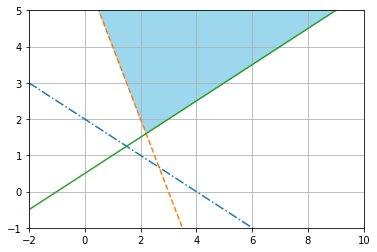

In [ ]:
x_1 = np.linspace(-100, 100, 10000)
#Primera restriccion
x_2_1 = (4-x_1)/2
#Segunda restriccon
x_2_2 = 6-2*x_1
#Tercera restriccion
x_2_3 = (1+x_1)/2

#Variables auxiliares para sombrear
u = np.maximum(x_2_2, x_2_3)
max = [10 for i in range( 10000)]


plt.plot(x_1, x_2_1, linestyle = "-.")
plt.plot(x_1,x_2_2, linestyle = "--") 
plt.plot(x_1,x_2_3) 
plt.grid()
plt.ylim(-1,5)
plt.xlim(-2,10)
plt.fill_between(x_1, max, u, color ='#9DD7EE') 
plt.show()

#Problema 2


In [ ]:
# Declaramos el problema
problema = LpProblem("Dieta_de_soldados", sense= LpMinimize)

#Declaramos las variables
A = LpVariable('Pan', lowBound=0, cat = LpInteger)
B = LpVariable('Carne', lowBound=0, cat = LpInteger)
C = LpVariable('Vegetales', lowBound=0, cat = LpInteger)
D = LpVariable('Papas', lowBound=0, cat = LpInteger)

#Funcion objetivo
problema += 12*A + 50*B + 25*C + 18*D, 'Funcion objetivo'

#Declaramos las restricciones
problema += 2*A + B + 8*C + 4*D >= 20, 'Carbohidratos'
problema += A + B + 4.8*C + 4*D >= 15, 'Proteinas'
problema += 4*A + 3*B + 4*C + 3*D >= 15, 'Grasas'

print(problema)

problema.solve()

#Imprimimos la solucion
print('**Dieta para los soldados:**')
print("Pan: ", A.varValue)
print("Carne: ", B.varValue)
print("Vegetales: ", C.varValue)
print("Papas: ", D.varValue)
print("Costo: ", value(problema.objective))

Dieta_de_soldados:
MINIMIZE
50*Carne + 12*Pan + 18*Papas + 25*Vegetales + 0
SUBJECT TO
Carbohidratos: Carne + 2 Pan + 4 Papas + 8 Vegetales >= 20

Proteinas: Carne + Pan + 4 Papas + 4.8 Vegetales >= 15

Grasas: 3 Carne + 4 Pan + 3 Papas + 4 Vegetales >= 15

VARIABLES
0 <= Carne Integer
0 <= Pan Integer
0 <= Papas Integer
0 <= Vegetales Integer

**Dieta para los soldados:**
Pan:  1.0
Carne:  0.0
Vegetales:  3.0
Papas:  0.0
Costo:  87.0


#Problema 3

##Opción 1
Únicamente se dispone con $280 pesos

In [ ]:
# Declaramos el problema
opcion1 = LpProblem("MUSEOS_A_VISITAR", sense= LpMaximize)

#Declaramos las variables
MAH = LpVariable('Antropologia', lowBound=0, cat = 'Binary')
PBA = LpVariable('Bellas Artes', lowBound=0, cat = 'Binary')
MTM = LpVariable('Templo Mayor', lowBound=0, cat = 'Binary')
MSO = LpVariable('Soumaya', lowBound=0, cat = 'Binary')
CCH = LpVariable('Castillo de Chapultepec', lowBound=0, cat = 'Binary')
MNA = LpVariable('MUNAL', lowBound=0, cat = 'Binary')
MRE= LpVariable('Monumento a la Revolucion', lowBound=0, cat = 'Binary')
MAM = LpVariable('Arte Moderno', lowBound=0, cat = 'Binary')
MFM = LpVariable('Franz Mayer', lowBound=0, cat = 'Binary')
MNC= LpVariable('Museo Nacional de la Cultura', lowBound=0, cat = 'Binary')
LPI = LpVariable('Los Pinos', lowBound=0, cat = 'Binary')

#Funcion objetivo
opcion1 += MAH + PBA + MTM + MSO + CCH + MNA + MRE + MAM + MFM + MNC + LPI, 'Funcion objetivo'

#Establecemos la restriccion de $280
opcion1 += 75*MAH + 30*PBA + 80*MTM + 0*MSO + 80*CCH + 75*MNA + 50*MRE + 70*MAM + 70*MFM + 17*MNC + 0*LPI <= 280, 'Restriccion'

print(opcion1)

opcion1.solve()

#Imprimimos la solucion
print('**Ruta:**')
print("Antropologia: ", MAH.varValue)
print("Bellas Artes: ", PBA.varValue)
print("Templo Mayor: ", MTM.varValue)
print("Soumaya: ", MSO.varValue)
print("Castillo de Chapultepec: ", CCH.varValue)
print("MUNAL: ", MNA.varValue)
print("Monumento a la Revolucion: ", MRE.varValue)
print("Arte Moderno: ", MAM.varValue)
print("Franz Mayer: ", MFM.varValue)
print("Museo Nacional de la Cultura: ", MNC.varValue)
print("Los Pinos: ", LPI.varValue)
print("Museos visitados: ", value(opcion1.objective))


MUSEOS_A_VISITAR:
MAXIMIZE
1*Antropologia + 1*Arte_Moderno + 1*Bellas_Artes + 1*Castillo_de_Chapultepec + 1*Franz_Mayer + 1*Los_Pinos + 1*MUNAL + 1*Monumento_a_la_Revolucion + 1*Museo_Nacional_de_la_Cultura + 1*Soumaya + 1*Templo_Mayor + 0
SUBJECT TO
Restriccion: 75 Antropologia + 70 Arte_Moderno + 30 Bellas_Artes
 + 80 Castillo_de_Chapultepec + 70 Franz_Mayer + 75 MUNAL
 + 50 Monumento_a_la_Revolucion + 17 Museo_Nacional_de_la_Cultura
 + 80 Templo_Mayor <= 280

VARIABLES
0 <= Antropologia <= 1 Integer
0 <= Arte_Moderno <= 1 Integer
0 <= Bellas_Artes <= 1 Integer
0 <= Castillo_de_Chapultepec <= 1 Integer
0 <= Franz_Mayer <= 1 Integer
0 <= Los_Pinos <= 1 Integer
0 <= MUNAL <= 1 Integer
0 <= Monumento_a_la_Revolucion <= 1 Integer
0 <= Museo_Nacional_de_la_Cultura <= 1 Integer
0 <= Soumaya <= 1 Integer
0 <= Templo_Mayor <= 1 Integer

**Ruta:**
Antropologia:  1.0
Bellas Artes:  1.0
Templo Mayor:  0.0
Soumaya:  1.0
Castillo de Chapultepec:  0.0
MUNAL:  0.0
Monumento a la Revolucion:  1.0
Ar

##Opcion 2
Si la distancia entre dos lugares es menor que 1km, entonces visita ambos museos

Con la tabla de distancias notamos que unicamente el Museo de Arte Moderno y el Castillo de Chapultepec distan menor que 1km.
Como en la solución anterior visitó el Museo de Arte Moderno, entonces añadimos comop restricción que también visite el Castillo

In [ ]:
# Declaramos el problema
opcion2 = LpProblem("MUSEOS_A_VISITAR", sense= LpMaximize)

#Declaramos las variables
MAH = LpVariable('Antropologia', lowBound=0, cat = 'Binary')
PBA = LpVariable('Bellas Artes', lowBound=0, cat = 'Binary')
MTM = LpVariable('Templo Mayor', lowBound=0, cat = 'Binary')
MSO = LpVariable('Soumaya', lowBound=0, cat = 'Binary')
CCH = LpVariable('Castillo de Chapultepec', lowBound=0, cat = 'Binary')
MNA = LpVariable('MUNAL', lowBound=0, cat = 'Binary')
MRE= LpVariable('Monumento a la Revolucion', lowBound=0, cat = 'Binary')
MAM = LpVariable('Arte Moderno', lowBound=0, cat = 'Binary')
MFM = LpVariable('Franz Mayer', lowBound=0, cat = 'Binary')
MNC= LpVariable('Museo Nacional de la Cultura', lowBound=0, cat = 'Binary')
LPI = LpVariable('Los Pinos', lowBound=0, cat = 'Binary')

#Funcion objetivo
opcion2 += MAH + PBA + MTM + MSO + CCH + MNA + MRE + MAM + MFM + MNC + LPI, 'Funcion objetivo'

#Establecemos la restriccion de $280
opcion2 += 75*MAH + 30*PBA + 80*MTM + 0*MSO + 80*CCH + 75*MNA + 50*MRE + 70*MAM + 70*MFM + 17*MNC + 0*LPI <= 280, 'Restriccion'

#Aniadimos que visite los museos que se encuentran a menos de 1km de distancia
opcion2 += MNA == MFM
opcion2 += MNC == MTM

print(opcion2)

opcion2.solve()

#Imprimimos la solucion
print('**Ruta:**')
print("Antropologia: ", MAH.varValue)
print("Bellas Artes: ", PBA.varValue)
print("Templo Mayor: ", MTM.varValue)
print("Soumaya: ", MSO.varValue)
print("Castillo de Chapultepec: ", CCH.varValue)
print("MUNAL: ", MNA.varValue)
print("Monumento a la Revolucion: ", MRE.varValue)
print("Arte Moderno: ", MAM.varValue)
print("Franz Mayer: ", MFM.varValue)
print("Museo Nacional de la Cultura: ", MNC.varValue)
print("Los Pinos: ", LPI.varValue)
print("Museos visitados: ", value(opcion2.objective))

MUSEOS_A_VISITAR:
MAXIMIZE
1*Antropologia + 1*Arte_Moderno + 1*Bellas_Artes + 1*Castillo_de_Chapultepec + 1*Franz_Mayer + 1*Los_Pinos + 1*MUNAL + 1*Monumento_a_la_Revolucion + 1*Museo_Nacional_de_la_Cultura + 1*Soumaya + 1*Templo_Mayor + 0
SUBJECT TO
Restriccion: 75 Antropologia + 70 Arte_Moderno + 30 Bellas_Artes
 + 80 Castillo_de_Chapultepec + 70 Franz_Mayer + 75 MUNAL
 + 50 Monumento_a_la_Revolucion + 17 Museo_Nacional_de_la_Cultura
 + 80 Templo_Mayor <= 280

_C1: - Franz_Mayer + MUNAL = 0

_C2: Museo_Nacional_de_la_Cultura - Templo_Mayor = 0

VARIABLES
0 <= Antropologia <= 1 Integer
0 <= Arte_Moderno <= 1 Integer
0 <= Bellas_Artes <= 1 Integer
0 <= Castillo_de_Chapultepec <= 1 Integer
0 <= Franz_Mayer <= 1 Integer
0 <= Los_Pinos <= 1 Integer
0 <= MUNAL <= 1 Integer
0 <= Monumento_a_la_Revolucion <= 1 Integer
0 <= Museo_Nacional_de_la_Cultura <= 1 Integer
0 <= Soumaya <= 1 Integer
0 <= Templo_Mayor <= 1 Integer

**Ruta:**
Antropologia:  0.0
Bellas Artes:  1.0
Templo Mayor:  1.0
Soum

##Opción 3 
El grupo tiene que visitar el Museo Nacional de Antropología e Historia y el
Palacio de Bellas Artes.

In [ ]:
# Declaramos el problema
opcion3 = LpProblem("MUSEOS_A_VISITAR", sense= LpMaximize)

#Declaramos las variables
MAH = LpVariable('Antropologia', lowBound=0, cat = 'Binary')
PBA = LpVariable('Bellas Artes', lowBound=0, cat = 'Binary')
MTM = LpVariable('Templo Mayor', lowBound=0, cat = 'Binary')
MSO = LpVariable('Soumaya', lowBound=0, cat = 'Binary')
CCH = LpVariable('Castillo de Chapultepec', lowBound=0, cat = 'Binary')
MNA = LpVariable('MUNAL', lowBound=0, cat = 'Binary')
MRE= LpVariable('Monumento a la Revolucion', lowBound=0, cat = 'Binary')
MAM = LpVariable('Arte Moderno', lowBound=0, cat = 'Binary')
MFM = LpVariable('Franz Mayer', lowBound=0, cat = 'Binary')
MNC= LpVariable('Museo Nacional de la Cultura', lowBound=0, cat = 'Binary')
LPI = LpVariable('Los Pinos', lowBound=0, cat = 'Binary')

#Funcion objetivo
opcion3 += MAH + PBA + MTM + MSO + CCH + MNA + MRE + MAM + MFM + MNC + LPI, 'Funcion objetivo'

#Establecemos la restriccion de $280
opcion3 += 75*MAH + 30*PBA + 80*MTM + 0*MSO + 80*CCH + 75*MNA + 50*MRE + 70*MAM + 70*MFM + 17*MNC + 0*LPI <= 280, 'Restriccion'

#Añadimos que visite el Museo de Antropologia y Bellas Artes
opcion3 += MAH == 1
opcion3 += PBA == 1

print(opcion3)

opcion3.solve()

#Imprimimos la solucion
print('**Ruta:**')
print("Antropologia: ", MAH.varValue)
print("Bellas Artes: ", PBA.varValue)
print("Templo Mayor: ", MTM.varValue)
print("Soumaya: ", MSO.varValue)
print("Castillo de Chapultepec: ", CCH.varValue)
print("MUNAL: ", MNA.varValue)
print("Monumento a la Revolucion: ", MRE.varValue)
print("Arte Moderno: ", MAM.varValue)
print("Franz Mayer: ", MFM.varValue)
print("Museo Nacional de la Cultura: ", MNC.varValue)
print("Los Pinos: ", LPI.varValue)
print("Museos visitados: ", value(opcion3.objective))


MUSEOS_A_VISITAR:
MAXIMIZE
1*Antropologia + 1*Arte_Moderno + 1*Bellas_Artes + 1*Castillo_de_Chapultepec + 1*Franz_Mayer + 1*Los_Pinos + 1*MUNAL + 1*Monumento_a_la_Revolucion + 1*Museo_Nacional_de_la_Cultura + 1*Soumaya + 1*Templo_Mayor + 0
SUBJECT TO
Restriccion: 75 Antropologia + 70 Arte_Moderno + 30 Bellas_Artes
 + 80 Castillo_de_Chapultepec + 70 Franz_Mayer + 75 MUNAL
 + 50 Monumento_a_la_Revolucion + 17 Museo_Nacional_de_la_Cultura
 + 80 Templo_Mayor <= 280

_C1: Antropologia = 1

_C2: Bellas_Artes = 1

VARIABLES
0 <= Antropologia <= 1 Integer
0 <= Arte_Moderno <= 1 Integer
0 <= Bellas_Artes <= 1 Integer
0 <= Castillo_de_Chapultepec <= 1 Integer
0 <= Franz_Mayer <= 1 Integer
0 <= Los_Pinos <= 1 Integer
0 <= MUNAL <= 1 Integer
0 <= Monumento_a_la_Revolucion <= 1 Integer
0 <= Museo_Nacional_de_la_Cultura <= 1 Integer
0 <= Soumaya <= 1 Integer
0 <= Templo_Mayor <= 1 Integer

**Ruta:**
Antropologia:  1.0
Bellas Artes:  1.0
Templo Mayor:  0.0
Soumaya:  1.0
Castillo de Chapultepec:  0.0


##Opcion 4
El grupo tiene que visitar el Monumento de la Revolución y el Castillo de Chapultepec.

In [ ]:
# Declaramos el problema
opcion4 = LpProblem("MUSEOS_A_VISITAR", sense= LpMaximize)

#Declaramos las variables
MAH = LpVariable('Antropologia', lowBound=0, cat = 'Binary')
PBA = LpVariable('Bellas Artes', lowBound=0, cat = 'Binary')
MTM = LpVariable('Templo Mayor', lowBound=0, cat = 'Binary')
MSO = LpVariable('Soumaya', lowBound=0, cat = 'Binary')
CCH = LpVariable('Castillo de Chapultepec', lowBound=0, cat = 'Binary')
MNA = LpVariable('MUNAL', lowBound=0, cat = 'Binary')
MRE= LpVariable('Monumento a la Revolucion', lowBound=0, cat = 'Binary')
MAM = LpVariable('Arte Moderno', lowBound=0, cat = 'Binary')
MFM = LpVariable('Franz Mayer', lowBound=0, cat = 'Binary')
MNC= LpVariable('Museo Nacional de la Cultura', lowBound=0, cat = 'Binary')
LPI = LpVariable('Los Pinos', lowBound=0, cat = 'Binary')

#Funcion objetivo
opcion4 += MAH + PBA + MTM + MSO + CCH + MNA + MRE + MAM + MFM + MNC + LPI, 'Funcion objetivo'

opcion4 += 75*MAH + 30*PBA + 80*MTM + 0*MSO + 80*CCH + 75*MNA + 50*MRE + 70*MAM + 70*MFM + 17*MNC + 0*LPI <= 280, 'Restriccion'

#Añadimos que visite el Monumento a la Revolucion y el Castillo
opcion4 += MRE == 1
opcion4 += CCH == 1

print(opcion4)

opcion4.solve()

#Imprimimos la solucion
print('**Ruta:**')
print("Antropologia: ", MAH.varValue)
print("Bellas Artes: ", PBA.varValue)
print("Templo Mayor: ", MTM.varValue)
print("Soumaya: ", MSO.varValue)
print("Castillo de Chapultepec: ", CCH.varValue)
print("MUNAL: ", MNA.varValue)
print("Monumento a la Revolucion: ", MRE.varValue)
print("Arte Moderno: ", MAM.varValue)
print("Franz Mayer: ", MFM.varValue)
print("Museo Nacional de la Cultura: ", MNC.varValue)
print("Los Pinos: ", LPI.varValue)
print("Museos visitados: ", value(opcion4.objective))

MUSEOS_A_VISITAR:
MAXIMIZE
1*Antropologia + 1*Arte_Moderno + 1*Bellas_Artes + 1*Castillo_de_Chapultepec + 1*Franz_Mayer + 1*Los_Pinos + 1*MUNAL + 1*Monumento_a_la_Revolucion + 1*Museo_Nacional_de_la_Cultura + 1*Soumaya + 1*Templo_Mayor + 0
SUBJECT TO
Restriccion: 75 Antropologia + 70 Arte_Moderno + 30 Bellas_Artes
 + 80 Castillo_de_Chapultepec + 70 Franz_Mayer + 75 MUNAL
 + 50 Monumento_a_la_Revolucion + 17 Museo_Nacional_de_la_Cultura
 + 80 Templo_Mayor <= 280

_C1: Monumento_a_la_Revolucion = 1

_C2: Castillo_de_Chapultepec = 1

VARIABLES
0 <= Antropologia <= 1 Integer
0 <= Arte_Moderno <= 1 Integer
0 <= Bellas_Artes <= 1 Integer
0 <= Castillo_de_Chapultepec <= 1 Integer
0 <= Franz_Mayer <= 1 Integer
0 <= Los_Pinos <= 1 Integer
0 <= MUNAL <= 1 Integer
0 <= Monumento_a_la_Revolucion <= 1 Integer
0 <= Museo_Nacional_de_la_Cultura <= 1 Integer
0 <= Soumaya <= 1 Integer
0 <= Templo_Mayor <= 1 Integer

**Ruta:**
Antropologia:  0.0
Bellas Artes:  1.0
Templo Mayor:  0.0
Soumaya:  1.0
Castil

##Opción 5

### Minimizando el tiempo y minimizando el precio

In [ ]:
# Declaramos el problema
opcion5_1 = LpProblem("MUSEOS_A_VISITAR", sense= LpMaximize)

#Declaramos las variables
MAH = LpVariable('Antropologia', lowBound=0, cat = 'Binary')
PBA = LpVariable('Bellas Artes', lowBound=0, cat = 'Binary')
MTM = LpVariable('Templo Mayor', lowBound=0, cat = 'Binary')
MSO = LpVariable('Soumaya', lowBound=0, cat = 'Binary')
CCH = LpVariable('Castillo de Chapultepec', lowBound=0, cat = 'Binary')
MNA = LpVariable('MUNAL', lowBound=0, cat = 'Binary')
MRE= LpVariable('Monumento a la Revolucion', lowBound=0, cat = 'Binary')
MAM = LpVariable('Arte Moderno', lowBound=0, cat = 'Binary')
MFM = LpVariable('Franz Mayer', lowBound=0, cat = 'Binary')
MNC= LpVariable('Museo Nacional de la Cultura', lowBound=0, cat = 'Binary')
LPI = LpVariable('Los Pinos', lowBound=0, cat = 'Binary')

#Funcion objetivo
opcion5_1 += MAH + PBA + MTM + MSO + CCH + MNA + MRE + MAM + MFM + MNC + LPI, 'Funcion objetivo'

# Restricciones
opcion5_1 += 3.5*MAH + 2.1*PBA + 2.5*MTM + 3.8*MSO + 4.5*CCH + 2.5*MNA + 2.1*MRE + 3.5*MAM + 1.5*MFM + 3.25*MNC + 2.1*LPI <= 8, 'Restriccion tiempo'
opcion5_1 += 75*MAH + 30*PBA + 80*MTM + 0*MSO + 80*CCH + 75*MNA + 50*MRE + 70*MAM + 70*MFM + 17*MNC + 0*LPI <= 180, 'Restriccion dinero'

print(opcion5_1)

opcion5_1.solve()

#Imprimimos la solucion
print('**Ruta:**')
print("Antropologia: ", MAH.varValue)
print("Bellas Artes: ", PBA.varValue)
print("Templo Mayor: ", MTM.varValue)
print("Soumaya: ", MSO.varValue)
print("Castillo de Chapultepec: ", CCH.varValue)
print("MUNAL: ", MNA.varValue)
print("Monumento a la Revolucion: ", MRE.varValue)
print("Arte Moderno: ", MAM.varValue)
print("Franz Mayer: ", MFM.varValue)
print("Museo Nacional de la Cultura: ", MNC.varValue)
print("Los Pinos: ", LPI.varValue)
print("Museos visitados: ", value(opcion5_1.objective))

MUSEOS_A_VISITAR:
MAXIMIZE
1*Antropologia + 1*Arte_Moderno + 1*Bellas_Artes + 1*Castillo_de_Chapultepec + 1*Franz_Mayer + 1*Los_Pinos + 1*MUNAL + 1*Monumento_a_la_Revolucion + 1*Museo_Nacional_de_la_Cultura + 1*Soumaya + 1*Templo_Mayor + 0
SUBJECT TO
Restriccion_tiempo: 3.5 Antropologia + 3.5 Arte_Moderno + 2.1 Bellas_Artes
 + 4.5 Castillo_de_Chapultepec + 1.5 Franz_Mayer + 2.1 Los_Pinos + 2.5 MUNAL
 + 2.1 Monumento_a_la_Revolucion + 3.25 Museo_Nacional_de_la_Cultura
 + 3.8 Soumaya + 2.5 Templo_Mayor <= 8

Restriccion_dinero: 75 Antropologia + 70 Arte_Moderno + 30 Bellas_Artes
 + 80 Castillo_de_Chapultepec + 70 Franz_Mayer + 75 MUNAL
 + 50 Monumento_a_la_Revolucion + 17 Museo_Nacional_de_la_Cultura
 + 80 Templo_Mayor <= 180

VARIABLES
0 <= Antropologia <= 1 Integer
0 <= Arte_Moderno <= 1 Integer
0 <= Bellas_Artes <= 1 Integer
0 <= Castillo_de_Chapultepec <= 1 Integer
0 <= Franz_Mayer <= 1 Integer
0 <= Los_Pinos <= 1 Integer
0 <= MUNAL <= 1 Integer
0 <= Monumento_a_la_Revolucion <= 1 In

### Maximizando la calificación de los museos

In [ ]:
def max_apreciacion(minimo:float)-> list:
  '''
  Funcion que selecciona los museos con calificacion mayor o igual a minimo
  Entrada:
        minimo: float que indica la calificacion minimo que el usuario quiere
        por cada museo
  Salida: lista de museos que cumplen con la condicion de que su calificacion 
          es mayor o igual a minimo

  >>>>>> max_apreciacion(4.7)
  ['MAH', 'PBA', 'MTM', 'MSO', 'CCH', 'MNA', 'MRE', 'MNC']
  '''
  #Definimos un diccionario con los museos y su respectiva calificacion
  ranking = {'MAH': 4.8, 'PBA':4.8, 'MTM':4.8, 'MSO':4.7, 'CCH':4.8, 'MNA':4.8, 
           'MRE':4.7 ,'MAM':4.6, 'MFM':4.6, 'MNC':4.7, 'LPI':4.3}
  #Lista que va a contener el recorrido final
  recorrido = []
  #Recorremos el diccionario
  for museo, valor in ranking.items():
    #Si el museo cumple que su calificacion es mayor o igual que la dada
    #entonces lo añade al recorrido
    if valor >= minimo:
      recorrido.append(museo)
  #Regresamos el recorrido
  return recorrido